In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [24]:
data = pd.read_csv('Raisindata.csv')
# Remove rows with missing values
data.dropna(inplace=True)
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,Kecimen
1,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,Besni
2,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,Kecimen
3,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,Besni
4,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,Kecimen


In [26]:
data['Class'] = data['Class'].map({"Kecimen": 0, "Besni": 1})

In [27]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,0
1,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1
2,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,0
3,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,1
4,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,0


In [28]:
split_index = int(0.8*len(data))

In [29]:
# 2. Split the DataFrame manually using .iloc
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [30]:
# 3. Separate features (X) and targets (Y) for both training and test sets.
X_train = train_data.drop(columns='Class').values
y_train = train_data['Class'].values

X_test = test_data.drop(columns='Class').values
y_test = test_data['Class'].values

In [31]:
# 4) Scale features   ## if i wont add feature scaling then it give 0% accrucacy but by adding this now it is giving something
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
print(X_train_scaled.shape)

(720, 7)


## Forward Propagation
- **X**: (720, 7)
- **W**: (7,)
- **b**: (1,)
- **z**: (720,)
- **A (sigmoid output)**: (720,)

## Backpropagation
- **dz**: (720,)
- **dw**: (7,)
- **db**: (1,)

In [33]:
class LogisticRegression:
    def __init__(self) -> None:
        self.weights : np.ndarray = None
        self.bias : float = 0.0
    
    #Sigmoid method
    def _sigmoid(self, x) -> float:
        return 1 / (1 + np.exp(-x))
    
    def hypothesisFunction(self, X: np.ndarray) -> np.ndarray:
        """Predicts output using learned weights."""
        if self.weights is None:
            return np.zeros(len(X))
        z = np.dot(X, self.weights) + self.bias
        A = self._sigmoid(z)
        return A
    
    def compute_loss(self, y_true: np.ndarray, y_pred: np.ndarray)-> float:
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def train(
        self,
        X: np.ndarray,
        y_true: np.ndarray,
        learning_rate: float = 0.0001,
        epochs: int = 50
    ) -> tuple[list[float], list[float]]:
        pass
        if self.weights is None:
            self.weights = np.zeros(X.shape[1])

        m = len(y_true)
        bce_history: list[float] = []
        acc_history: list[float] = []


        for epoch in range(epochs):
            # Forward pass
            A = self.hypothesisFunction(X)
            binaryCrossEntropy = self.compute_loss(y_true, A)

            # Calculate accuracy (%)
            y_pred_cls = [1 if i > 0.5 else 0 for i in A]
            accuracy = np.mean(y_pred_cls == y_true) * 100

            # Print progress
            print(f"Epoch {epoch+1}/{epochs} | Binary Cross Entropy: {binaryCrossEntropy:.4f} | Accuracy: {accuracy:.2f}")

            # Backward pass
            dz = A - y_true # derivative of sigmoid and bce X.T*(A-y)

            # compute gradients
            dw = (1 / m) * np.dot(X.T, dz)
            db = (1 / m) * np.sum(dz)

            # Update weights
            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            # Store logs
            bce_history.append(binaryCrossEntropy)
            acc_history.append(accuracy)

        return bce_history, acc_history
    
    def predict(self, X:  np.array) -> np.array:
        threshold = .5
        y_hat = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]
        
        return np.array(y_predicted_cls)

In [34]:
# 5) Create and train the model
model = LogisticRegression()
bce_history, acc_history = model.train(
    X=X_train_scaled,
    y_true=y_train,
    learning_rate=0.1,
    epochs=100
)

Epoch 1/100 | Binary Cross Entropy: 0.6931 | Accuracy: 50.69
Epoch 2/100 | Binary Cross Entropy: 0.6427 | Accuracy: 83.89
Epoch 3/100 | Binary Cross Entropy: 0.6034 | Accuracy: 84.03
Epoch 4/100 | Binary Cross Entropy: 0.5725 | Accuracy: 84.03
Epoch 5/100 | Binary Cross Entropy: 0.5477 | Accuracy: 84.17
Epoch 6/100 | Binary Cross Entropy: 0.5274 | Accuracy: 84.44
Epoch 7/100 | Binary Cross Entropy: 0.5106 | Accuracy: 84.58
Epoch 8/100 | Binary Cross Entropy: 0.4964 | Accuracy: 84.58
Epoch 9/100 | Binary Cross Entropy: 0.4844 | Accuracy: 84.58
Epoch 10/100 | Binary Cross Entropy: 0.4740 | Accuracy: 84.86
Epoch 11/100 | Binary Cross Entropy: 0.4649 | Accuracy: 85.00
Epoch 12/100 | Binary Cross Entropy: 0.4570 | Accuracy: 85.00
Epoch 13/100 | Binary Cross Entropy: 0.4500 | Accuracy: 85.00
Epoch 14/100 | Binary Cross Entropy: 0.4438 | Accuracy: 85.00
Epoch 15/100 | Binary Cross Entropy: 0.4382 | Accuracy: 85.00
Epoch 16/100 | Binary Cross Entropy: 0.4332 | Accuracy: 85.00
Epoch 17/100 | Bi

In [35]:
# 5) Print Final Training Metrics
print(f"Final Training Loss (Binary Cross Entropy): {bce_history[-1]:.4f}")
print(f"Final Training acc_history: {acc_history[-1]:.4f}")

Final Training Loss (Binary Cross Entropy): 0.3601
Final Training acc_history: 86.5278


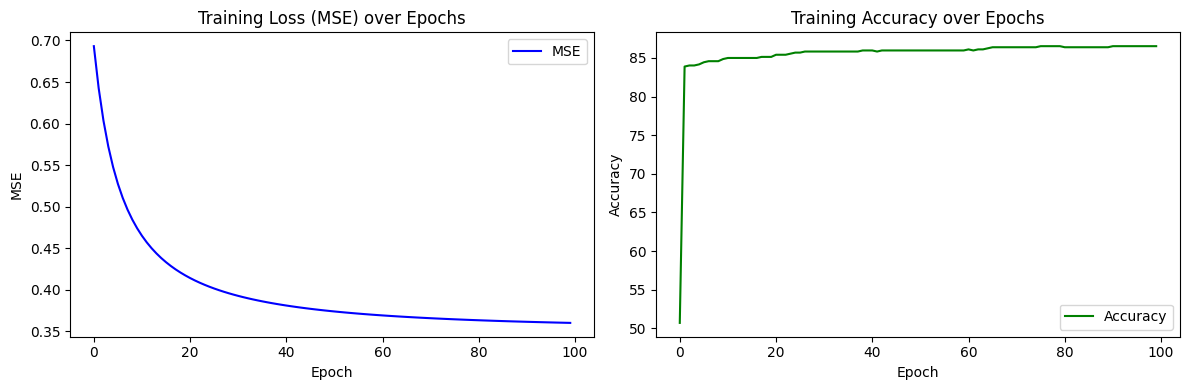

In [36]:
# 6) Plot MSE and Accuracy over epochs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(bce_history, label='MSE', color='blue')
axes[0].set_title('Training Loss (MSE) over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(acc_history, label='Accuracy', color='green')
axes[1].set_title('Training Accuracy over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [37]:
predictions = model.predict(X_test_scaled)

In [38]:
# Print test accuracy
test_accuracy: float = accuracy_score(y_test, predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 87.78%


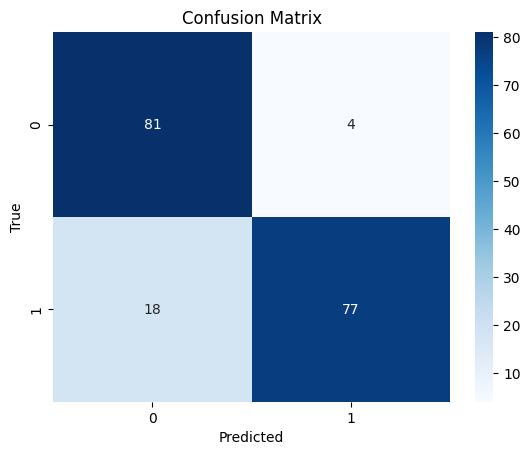

In [39]:
# Display confusion matrix
cm: np.ndarray = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()